In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import namedtuple
from itertools import groupby

In [2]:
Duplicate = namedtuple('Duplicate',
                       ['member_id', 'doi', 'duplicate_member', 'duplicate_doi', 'score_diff', 'is_self', 'relation',
                        'created_before'])
duplicates = []
with open('data/duplicates.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        duplicates.append(Duplicate(int(row[0]), row[1], int(row[2]), row[3], float(row[4]),
                                    row[5]=='self', row[6] if row[6] != 'duplicate' else '', row[7]=='created_before'))

In [3]:
Member = namedtuple('Member', ['id', 'name', 'total_dois', 'sample_size', 'self_fraction', 'others_fraction'])
members = []
with open('data/members.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        members.append(Member(int(row[0]), row[1], int(row[2]), int(row[3]), float(row[5]), float(row[7])))

In [4]:
len(members)

590

In [5]:
duplicates = [d for d in duplicates if d.relation == '']

total_tested_dois = sum([m.sample_size for m in members])
print(total_tested_dois)
total_duplicates = len(duplicates)
print(total_duplicates)
print(total_duplicates / total_tested_dois)

524496
4240
0.008083951069216925


In [6]:
total_self_duplicates = len([d for d in duplicates if d.is_self])
print(total_self_duplicates)
print(total_self_duplicates / total_duplicates)
total_other_duplicates = len([d for d in duplicates if not d.is_self])
print(total_other_duplicates)
print(total_other_duplicates / total_duplicates)

3603
0.8497641509433962
637
0.15023584905660378


## Self-duplicates

In [7]:
self_fractions = [m.self_fraction for m in members]
np.mean(self_fractions)

0.006662959746000749

0.43559322033898307


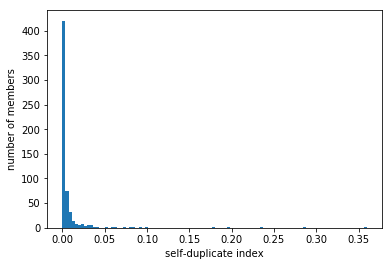

In [8]:
print(len([f for f in self_fractions if f == 0.]) / len(self_fractions))
plt.hist(self_fractions, 100)
plt.xlabel('self-duplicate index')
plt.ylabel('number of members')
plt.savefig('images/distr_self.png', dpi=300, bbox_inches='tight')

In [9]:
members_flag_self = [m for m in members if m.self_fraction > 0.02]
members_flag_self = sorted(members_flag_self, key=lambda x: x.self_fraction, reverse=True)
members_flag_self = [(m.id, m.name, m.total_dois, m.sample_size, m.self_fraction) for m in members_flag_self]
members_flag_self = pd.DataFrame(members_flag_self,
                                 columns =['id', 'name', 'total DOIs', 'sample size', 'self-duplicate index'])
members_flag_self

id                                               name  total DOIs  \
0    408                     University of California Press      129741   
1    378                            Inderscience Publishers      127729   
2    234                     American Society of Hematology      137124   
3   9700  Pro Reitoria de Pesquisa, Pos Graduacao e Inov...        7756   
4   1167                      American Diabetes Association       49536   
5   3979                 EMH Swiss Medical Publishers, Ltd.       65213   
6   3664                           University Nove de Julho        6229   
7   4858      Institute of Advanced Engineering and Science       11356   
8   3612                  Universitat Autonoma de Barcelona       13838   
9    233       American Society of Clinical Oncology (ASCO)      103011   
10  4499                                RCN Publishing Ltd.      149063   
11  9422                 Innovare Academic Sciences Pvt Ltd        6230   
12  3330                               Universidad de Chile       13828   
13  2901                            University of Ljubljana        7721   
14  1939                      University of Wisconsin Press       16602   
15  3786                      Publishing House Technologija        5741   
16   102                      Health Affairs (Project Hope)       10105   
17  3555                  Universidade Estadual de Londrina       11089   
18  1387  American Institute of Aeronautics and Astronau...       75175   
19  6139                                MedCrave Group, LLC       17906   
20  3145                                    Copernicus GmbH       84736   
21  2099    Shanghai Institute of Optics and Fine Mechanics       42180   
22  4945                                    Hans Publishers       24418   
23  5515  EDUFU - Editora da Universidade Federal de Ube...        5784   
24  5542                       Southern Medical Association       49187   
25  3785                     Universidade Federal do Parana       22104   
26  7349   Uniwersytetu Marii Curie-Sklodowskiej w Lublinie        5551   
27  1560                           Indiana University Press       19820   
28  6689                 Academy of Science of South Africa       10081   
29  3819                           Kowsar Medical Institute       16353   
30   276          Ovid Technologies (Wolters Kluwer Health)     2152723   
31  2914                 Jaypee Brothers Medical Publishing       17887   
32  1822   Centers for Disease Control and Prevention (CDC)       12576   
33  2863      International Association for Food Protection       14067   
34  5716  Institute of Research and Community Services D...        7495   
35  7040       Indian Society for Education and Environment        9833   
36  4507                                       IACSIT Press        5418   
37  7770                                        Knowledge E        8040   
38  8164                                 Juniper Publishers        9398   

    sample size  self-duplicate index  
0           798              0.359649  
1           998              0.286573  
2           990              0.235354  
3           919              0.194777  
4           946              0.178647  
5           831              0.097473  
6           946              0.093023  
7           999              0.083083  
8           935              0.081283  
9           979              0.072523  
10          717              0.064156  
11         1000              0.061000  
12          941              0.053135  
13          973              0.042138  
14          871              0.037887  
15          993              0.036254  
16          925              0.034595  
17          991              0.034309  
18          929              0.033369  
19          994              0.033199  
20          996              0.033133  
21          966              0.032091  
22          993              0.031219  
23          976              0.030738  
24   

## Other-duplicates

In [10]:
others_fractions = [m.others_fraction for m in members]
np.mean(others_fractions)

0.0012836878184451423

0.8932203389830509


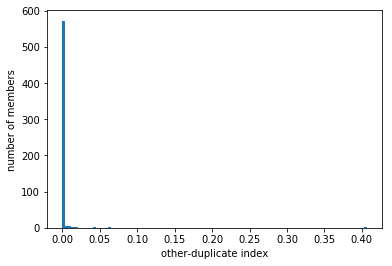

In [11]:
print(len([f for f in others_fractions if f == 0.]) / len(others_fractions))
plt.hist(others_fractions, 100)
plt.xlabel('other-duplicate index')
plt.ylabel('number of members')
plt.savefig('images/distr_other.png', dpi=300, bbox_inches='tight')

In [12]:
def get_dupl_members(duplicates, mid):
    md = [d for d in duplicates if d.member_id == mid and not d.is_self]
    others = set([d.duplicate_member for d in md])
    others = [(o, len([d for d in md if d.duplicate_member == o])) for o in others]
    others = sorted(others, key=lambda x: x[1], reverse=True)
    return ', '.join(['{}: {}'.format(o[0], o[1]) for o in others])

def get_dupl_dates(duplicates, mid):
    md = [d for d in duplicates if d.member_id == mid and not d.is_self]
    return '{} / {}'.format(len([d for d in md if not d.created_before]), len([d for d in md if d.created_before]))

In [13]:
members_flag_other = [m for m in members if m.others_fraction > 0.02]
members_flag_other = sorted(members_flag_other, key=lambda x: x.others_fraction, reverse=True)
members_flag_other = [(m.id, m.name, m.total_dois, m.sample_size, m.others_fraction,
                       get_dupl_members(duplicates, m.id), get_dupl_dates(duplicates, m.id))
                      for m in members_flag_other]
print(members_flag_other)
members_flag_other = pd.DataFrame(members_flag_other,
                                 columns =['id', 'name', 'total DOIs', 'sample size', 'other-duplicate index',
                                           'other members', 'created after/before other member'])
members_flag_other

[(1214, 'American Bryological and Lichenological Society', 5593, 844, 0.40639810426540285, '1121: 343', '343 / 0'), (138, 'Maney Publishing', 15342, 832, 0.06129807692307692, '301: 51', '5 / 46'), (1121, 'JSTOR', 1612174, 864, 0.041666666666666664, '276: 13, 301: 11, 311: 5, 37: 2, 179: 2, 14: 1, 56: 1, 252: 1', '2 / 34'), (14, 'American Mathematical Society (AMS)', 83015, 844, 0.041469194312796206, '1121: 35', '35 / 0')]


id                                             name  total DOIs  \
0  1214  American Bryological and Lichenological Society        5593   
1   138                                 Maney Publishing       15342   
2  1121                                            JSTOR     1612174   
3    14              American Mathematical Society (AMS)       83015   

   sample size  other-duplicate index  \
0          844               0.406398   
1          832               0.061298   
2          864               0.041667   
3          844               0.041469   

                                       other members  \
0                                          1121: 343   
1                                            301: 51   
2  276: 13, 301: 11, 311: 5, 37: 2, 179: 2, 14: 1...   
3                                           1121: 35   

  created after/before other member  
0                           343 / 0  
1                            5 / 46  
2                            2 / 34  
3                            35 / 0

In [14]:
def get_member_name(mid):
    member = [m for m in members if m.id == mid][0]
    return member.name

def get_member_total(mid):
    member = [m for m in members if m.id == mid][0]
    return member.total_dois

def get_dupl_members(duplicates, mid):
    md = [d for d in duplicates if d[0] == mid]
    others = set([d[1] for d in md])
    others = [(o, len([d for d in md if d[1] == o])) for o in others]
    others = sorted(others, key=lambda x: x[1], reverse=True)
    return ', '.join(['{}: {}'.format(o[0], o[1]) for o in others])

def get_dupl_dates(duplicates, mid):
    md = [d for d in duplicates if d[0] == mid]
    return '{} / {}'.format(len([d for d in md if not d[2]]), len([d for d in md if d[2]]))

In [15]:
other_duplicates = [d for d in duplicates if not d.is_self]
other_duplicates = [(d.member_id, d.duplicate_member, d.created_before) for d in other_duplicates] + \
                   [(d.duplicate_member, d.member_id, not d.created_before) for d in other_duplicates]
dupl_ids = sorted([o[0] for o in other_duplicates])
dupl_ids = groupby(dupl_ids)
dupl_ids = [(i, 2* len(list(g)) / len(other_duplicates)) for i, g in dupl_ids]
dupl_ids = sorted(dupl_ids, key=lambda x: x[1], reverse=True)
mids = set([i for i, _ in dupl_ids])
dupl_ids = dupl_ids + [(m.id, 0) for m in members if m.id not in mids]
print(len([j for i, j in dupl_ids]))
print(np.mean([j for i, j in dupl_ids]))
dupl_ids = [(i, get_member_name(i), get_member_total(i), j, get_dupl_members(other_duplicates, i),
             get_dupl_dates(other_duplicates, i))
            for i, j in dupl_ids if j > 0.02]
pd.DataFrame(dupl_ids,
             columns=['member ID', 'name', 'total DOIs', 'Global-Duplicate Index', 'other members', 'after/before'])

593
0.0033726812816188877


member ID                                             name  total DOIs  \
0        1121                                            JSTOR     1612174   
1        1214  American Bryological and Lichenological Society        5593   
2         301                               Informa UK Limited     4275507   
3         138                                 Maney Publishing       15342   
4          14              American Mathematical Society (AMS)       83015   
5         147                                     Project Muse      326300   
6         311                                            Wiley     8003815   
7          78                                      Elsevier BV    16268943   
8        7822                                    Test accounts      111567   
9        2165                       Liverpool University Press       31870   
10         56                 Cambridge University Press (CUP)     1621713   
11        276        Ovid Technologies (Wolters Kluwer Health)     2152723   
12       1696       University of Toronto Press Inc. (UTPress)       46778   

    Global-Duplicate Index                                      other members  \
0                 0.689168  1214: 343, 14: 36, 276: 13, 301: 12, 252: 11, ...   
1                 0.538462                                          1121: 343   
2                 0.145997  138: 51, 2165: 16, 1121: 12, 260: 6, 1762: 3, ...   
3                 0.080063                                            301: 51   
4                 0.056515                                           1121: 36   
5                 0.054945  1696: 13, 3287: 10, 1560: 6, 3673: 4, 3884: 1,...   
6                 0.034537  7822: 13, 1121: 5, 2: 1, 4068: 1, 3032: 1, 793: 1   
7                 0.026688  2026: 5, 2432: 1, 382: 1, 3394: 1, 233: 1, 189...   
8                 0.026688                       311: 13, 2: 2, 200: 1, 98: 1   
9                 0.025118                                            301: 16   
10                0.021978                                   170: 12, 1121: 2   
11                0.021978                                  1121: 13, 3111: 1   
12                0.020408                                            147: 13   

   after/before  
0       5 / 434  
1       343 / 0  
2       67 / 26  
3        5 / 46  
4        36 / 0  
5       14 / 21  
6        21 / 1  
7        7 / 10  
8        2 / 15  
9        16 / 0  
10       13 / 1  
11       13 / 1  
12        5 / 8